<a href="https://colab.research.google.com/github/ethanbrown33/enge_anc/blob/main/Copy_of_fourier_transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import pywt
#from scipy import signal
from scipy.optimize import curve_fit

import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy import stats
import scipy
# plt.style.use('ggplot')
# plt.rcParams['font.family'] = 'sans-serif'
# plt.rcParams['font.serif'] = 'Ubuntu'
# plt.rcParams['font.monospace'] = 'Ubuntu Mono'
# plt.rcParams['font.size'] = 14
# plt.rcParams['axes.labelsize'] = 12
# plt.rcParams['axes.labelweight'] = 'bold'
# plt.rcParams['axes.titlesize'] = 12
# plt.rcParams['xtick.labelsize'] = 12
# plt.rcParams['ytick.labelsize'] = 12
# plt.rcParams['legend.fontsize'] = 12
# plt.rcParams['figure.titlesize'] = 12
# plt.rcParams['image.cmap'] = 'jet'
# plt.rcParams['image.interpolation'] = 'none'
# plt.rcParams['figure.figsize'] = (12, 10)
# plt.rcParams['axes.grid']=True
# plt.rcParams['lines.linewidth'] = 2
# plt.rcParams['lines.markersize'] = 8
# colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
# 'xkcd:scarlet']

In [2]:
# start_date = data.Date.loc[0]
# end_date = data.Date.loc[len(data)-1]
# start_year = start_date.year
# start_month =  start_date.month
# start_day = start_date.day
# end_year = end_date.year
# end_month =  end_date.month
# end_day = end_date.day
# number_of_days = abs((end_date-start_date).days)
# start_date = datetime.date(start_date.year, start_date.month, start_date.day)
# date_list = []
# for day in range(number_of_days):
#     a_date = (start_date + datetime.timedelta(days = day)).isoformat()
#     date_list.append(a_date)
# date_list = pd.to_datetime(date_list)
# new_data = pd.DataFrame({'Date':date_list})
# x = new_data.Date
# old_x = data.Date
# y = []
# for i in range(len(x)):
#     x_i = x.loc[i]
#     diff_list = []
#     for j in range(len(data)):
#         diff_list.append(abs((x_i-old_x.loc[j]).days))
#     diff_list = np.array(diff_list)
#     y.append(data.Close[diff_list.argmin()])

# plt.figure(figsize=(20,10))
# plt.subplot(1,2,1)
# plt.title('Original Data',color='red',fontsize=20)
# plt.scatter(data.Date,data.Close,s=2)
# plt.xlabel('Date')
# plt.ylabel('Close')
# plt.subplot(1,2,2)
# plt.title('Smoothed Data',color='navy',fontsize=20)

# plt.scatter(x,y,s=2,color='navy')
# plt.xlabel('Date')
# plt.ylabel('Close')

In [3]:
# idx = np.linspace(0,len(x)-1,5).astype(int)
# X = np.array(new_data.index).reshape(-1,1)
# pf = PolynomialFeatures(3)
# X = pf.fit_transform(X)
# # y = 1 * x_0 + 2 * x_1 + 3
# reg = LinearRegression().fit(X, y)
# reg.score(X, y)
# # plt.plot(x,reg.predict(X),label='Polynomial Regression',color='firebrick')
# # plt.plot(x,y,label='Real Data',color='navy')
# # plt.plot(x,reg.predict(X)-y,label='Difference',color='darkorange')
# # plt.legend()
# # plt.xticks(x[idx],x[idx],rotation=45)
# # plt.xlabel('Time')
# # plt.ylabel('Price')

In [6]:
import librosa
file_path = 'sample_data/Fanfare60.wav'
y2, sr = librosa.load(file_path, sr=None)
print(y2)
print()
print(sr)

[ 0.          0.          0.         ... -0.10693359 -0.11679077
 -0.11404419]

22050


In [7]:
# signal = reg.predict(X)-y
# signal = signal-signal.mean()
# fft_signal = np.abs(np.fft.fft(signal))
#plt.plot(fft_signal[0:int(len(signal)/2.)],color='darkorange')
#plt.plot(fft_signal,color='darkorange')
fft_signal = y2
y3 = []
count = 0
while(count < len(y2)):
  y3.append(y2[count])
  count += 1000
# print(len(y2))
# print(len(signal))
# print(len(y3))
# plt.plot(y3,color='darkorange')
# plt.xlabel('Frequency Space (1/days)')
# plt.ylabel('Fourier Amplitude')

In [11]:
def filter_signal(th):
    f_s = fft_filter(th)
    return np.real(np.fft.ifft(f_s))
def fft_filter(perc):
    fft_signal = np.fft.fft(y3)
    fft_abs = np.abs(fft_signal)
    th=perc*(2*fft_abs[0:int(len(y3))]/((len(y3)))).max()
    fft_tof=fft_signal.copy()
    fft_tof_abs=np.abs(fft_tof)
    #fft_tof_abs=2*fft_tof_abs/((len(signal)/2.))
    fft_tof[fft_tof_abs<=th]=0
    return fft_tof
def fft_filter_amp(th):
    fft = np.fft.fft(y3)
    # fft = fft_signal
    fft_tof=fft.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/(len(fft_tof_abs)/2.)
    fft_tof_abs[fft_tof_abs<=th]=0
    return fft_tof_abs[0:int(len(fft_tof_abs)/2.)]

In [12]:
th_list = np.linspace(0,1,5)
th_list = th_list[0:len(th_list)-1]
# print(fft_signal)
# print(th_list)
th_list = np.array([0, 0.25, 0.5, 0.75])
for i in range(0,4):
    #plt.subplot(2,2,i+1)
    th_i=th_list[i].round(2)
    th_filter = fft_filter_amp(th_list[i])
#     plt.plot(th_filter[0:int(len(signal)/2.)],color='firebrick',label='Threshold = %.2f'%(th_list[i]))
#     plt.xlabel('Frequency Space (1/days)')
#     plt.ylabel('Fourier Amplitude')
#     plt.legend()
# plt.tight_layout()

In [13]:
#print(len(x))
x = [y for y in range(0, len(y3))]
for i in range(0,4):
    # plt.subplot(2,2,i+1)
    #th_i=th_list[i].round(2)
    th_filter = fft_filter(th_list[i])
    signal_filter =np.real(np.fft.ifft(th_filter))
#     plt.plot(x,signal_filter,color='firebrick',label='Threshold = %.2f'%(th_list[i]))
#     plt.xlabel('Time')
#     plt.ylabel('Signal')
#     plt.legend()
# plt.tight_layout()

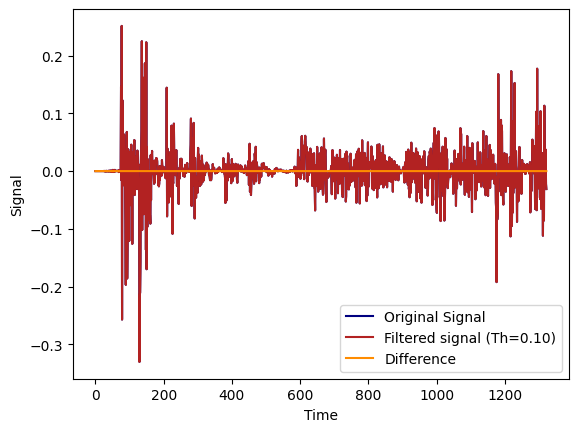

In [14]:
x = [y for y in range(0, len(y3))]
th_example_value = 0.10
example_signal = filter_signal(th_example_value)
plt.plot(x,y3,color='navy',label='Original Signal')
plt.plot(x,example_signal,color='firebrick',label='Filtered signal (Th=%.2f)'%(th_example_value))
plt.plot(x,y3-example_signal,color='darkorange',label='Difference')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.legend()

Text(0.5, 0, 'Threshold Value')

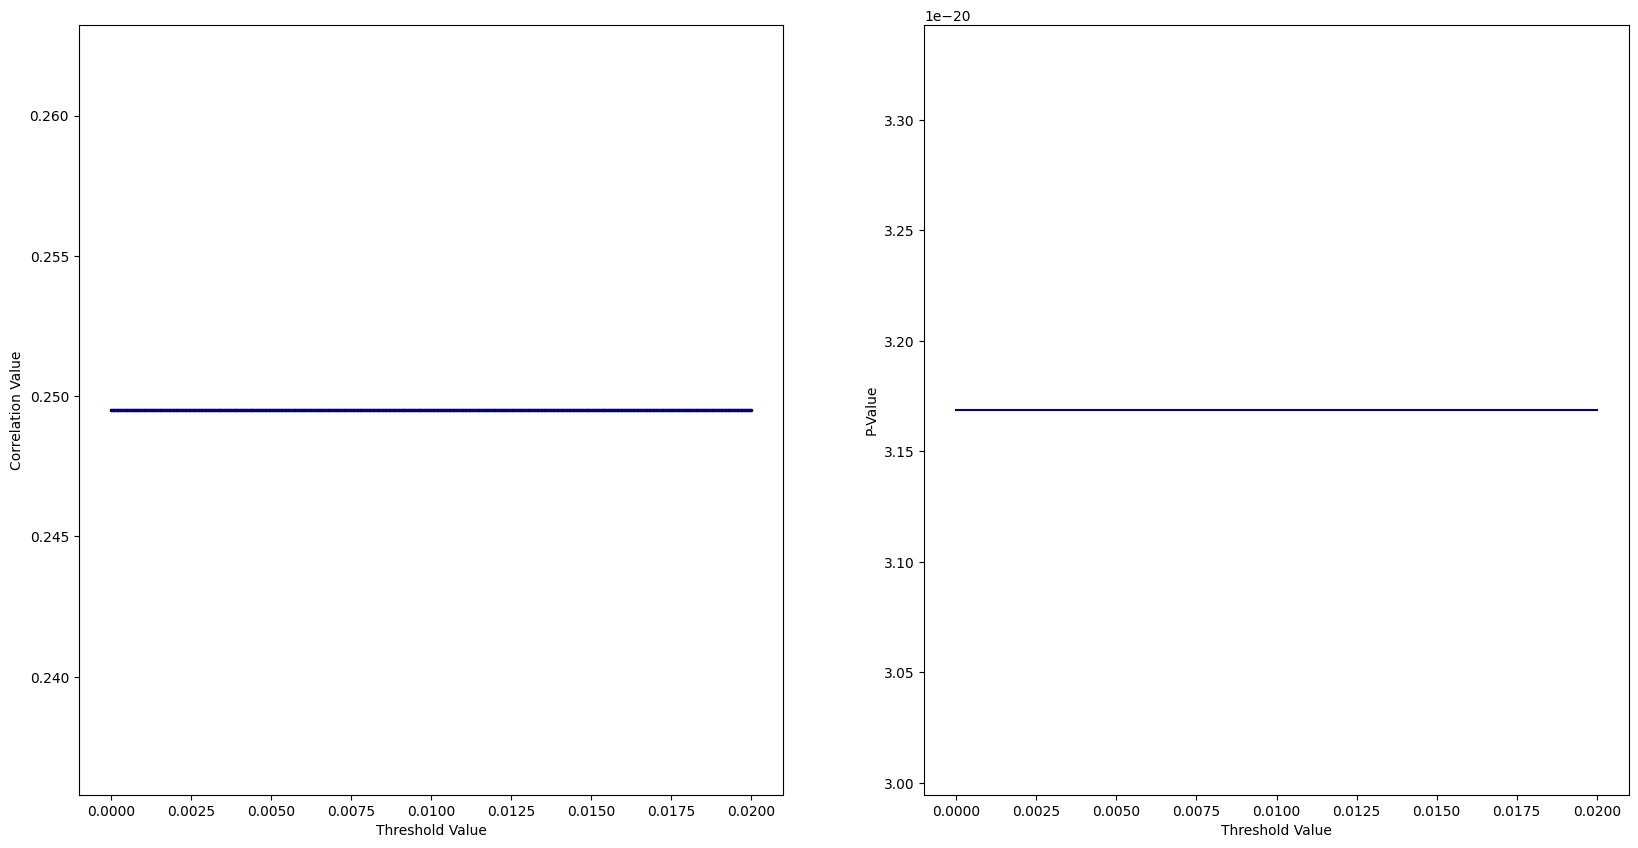

In [15]:
th_list = np.linspace(0,0.02,1000)
th_list = th_list[0:len(th_list)]
p_values = []
corr_values = []
for t in th_list:
    filt_signal = filter_signal(t)
    res = stats.spearmanr(y3,y3-filt_signal)
    p_values.append(res.pvalue)
    corr_values.append(res.correlation)
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.scatter(th_list,corr_values,s=2,color='navy')
#plt.plot(th_list,p_values)
plt.ylabel('Correlation Value')
plt.xlabel('Threshold Value')
plt.subplot(1,2,2)
plt.plot(th_list,p_values,color='navy')
#plt.plot(th_list,p_values)
plt.ylabel('P-Value')
plt.xlabel('Threshold Value')

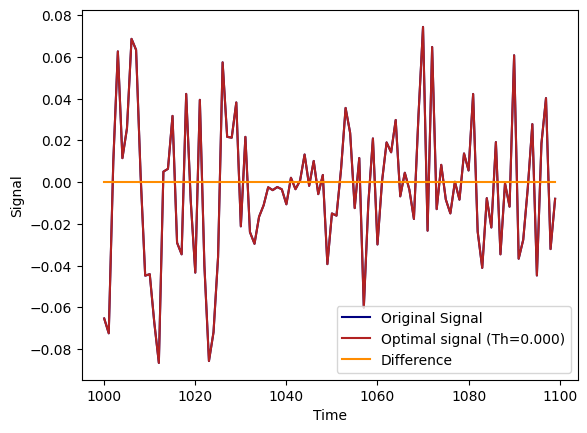

In [16]:
th_opt = th_list[np.array(corr_values).argmin()]
opt_signal = filter_signal(th_opt)
plt.plot(x[1000:1100],y3[1000:1100],color='navy',label='Original Signal')
plt.plot(x[1000:1100],opt_signal[1000:1100],color='firebrick',label='Optimal signal (Th=%.3f)'%(th_opt))
plt.plot(x[1000:1100],(y3-opt_signal)[1000:1100],color='darkorange',label='Difference')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.legend()

[-0.0652771  -0.07235718  0.01004028  0.06262207  0.01150513  0.02578735
  0.06863403  0.06335449  0.00302124 -0.04476929 -0.04403687 -0.06726074
 -0.08654785  0.0050354   0.00637817  0.03173828 -0.0289917  -0.0345459
  0.04226685 -0.00891113 -0.04330444  0.03942871 -0.04000854 -0.08563232
 -0.0718689  -0.03585815  0.05737305  0.021698    0.02130127  0.03817749
 -0.02114868  0.021698   -0.02389526 -0.0295105  -0.01657104 -0.01107788
 -0.00244141 -0.0038147  -0.00231934 -0.00341797 -0.0105896   0.00210571
 -0.00335693  0.0007019   0.01324463 -0.0017395   0.01016235 -0.0057373
  0.00344849 -0.03924561 -0.01498413 -0.01602173  0.00613403  0.03555298
  0.02355957 -0.01242065  0.01156616 -0.06008911 -0.00982666  0.02093506
 -0.02981567  0.00039673  0.01904297  0.01431274  0.02978516 -0.0067749
  0.0045166  -0.00357056 -0.01760864  0.03182983  0.07434082 -0.02322388
  0.06472778 -0.01290894  0.00830078 -0.00827026 -0.01495361  0.00021362
 -0.00839233  0.01376343  0.00561523  0.04223633 -0.02

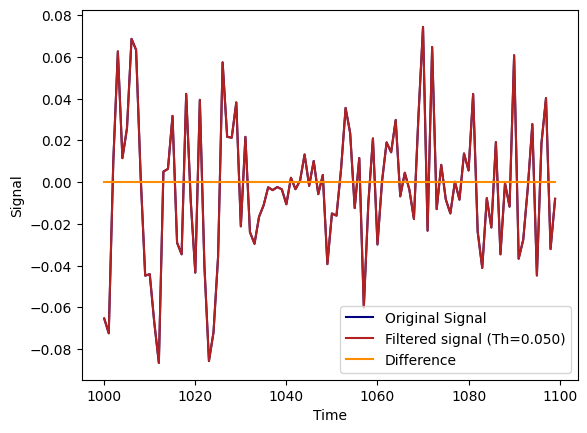

In [19]:
th_opt = th_list[np.array(corr_values).argmin()]
opt_signal = filter_signal(th_opt)
# print(opt_signal[1000:1100])
# print((y3-opt_signal)[1000:1100])
# plt.plot(x[1000:1100],y3[1000:1100],color='navy',label='Original Signal')
# plt.plot(x[1000:1100],opt_signal[1000:1100],color='firebrick',label='Filtered signal (Th=%.3f)'%(0.05))
# plt.plot(x[1000:1100],(y3-opt_signal)[1000:1100],color='darkorange',label='Difference')
# plt.xlabel('Time')
# plt.ylabel('Signal')
# plt.legend()